# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Ingest Data  

In [5]:
df = pd.read_excel('World military power.xlsx', header=[1])
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    float64
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    float64
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    float64
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    float64
 10  Trainer Aircraft Fleet                   138 non-n

## Implement basic steps to see how is your data looks like

In [8]:
df.shape

(138, 60)

In [9]:
df.isna().sum().any()

True

In [10]:
df.duplicated().sum()

0

## Convert multi index columns to one level

In [11]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


## Detect and drop duplicated columns

In [12]:
value_cols = [i[0] for i in df.columns.str.findall(".*value") if i !=[]]

value_cols

['Aircraft Strength value',
 'Fighter/Interceptor Strength value',
 'Attack Aircraft Strength value',
 'Transport Aircraft Fleet Strength value',
 'Trainer Aircraft Fleet value',
 'Helicopter Fleet Strength value',
 'Attack Helicopter Fleet Strength value',
 'Tank Strength value',
 'AFV/APC Strength value',
 'Self-Propelled Artillery Strength value',
 'Towed Artillery Strength value',
 'Rocket Projector Strength value',
 'Navy Fleet Strengths value',
 'Aircraft Carrier Fleet Strength value',
 'Submarine Fleet Strength value',
 'Destroyer Fleet Strength value',
 'Frigate Fleet Strength value',
 'defense spending budget value',
 'External Debt value',
 'Airport Totals value',
 'Oil Production value',
 'Oil Consumption value',
 'Proven Oil Reserves value',
 'Available Manpower value',
 'Total Population value',
 'Total Square Land Area value',
 'Total Coastline Coverage value',
 'Total Waterway Coverage value',
 'Total Border Coverage value']

In [20]:
value_df = df[value_cols].copy()
value_df.insert(0, "country",df["Military Strength"])
value_df.insert(1, "Military Strength Power Index", df["Military Strength Power Index"])
value_df.head()

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


## Check for missing values 

In [21]:
df.isnull().sum().sort_values(ascending=False)

Total Coastline Coverage value             29
Total Coastline Coverage                   29
Submarine Fleet Strength                   23
Frigate Fleet Strength value               23
Frigate Fleet Strength                     23
Destroyer Fleet Strength value             23
Destroyer Fleet Strength                   23
Submarine Fleet Strength value             23
Aircraft Carrier Fleet Strength value      23
Aircraft Carrier Fleet Strength            23
Navy Fleet Strengths                       14
Navy Fleet Strengths value                 14
Total Border Coverage                       9
Total Border Coverage value                 9
Attack Helicopter Fleet Strength            0
Available Manpower                          0
External Debt value                         0
Airport Totals                              0
Airport Totals value                        0
Oil Production                              0
Oil Production value                        0
Oil Consumption                   

<Figure size 288x432 with 0 Axes>

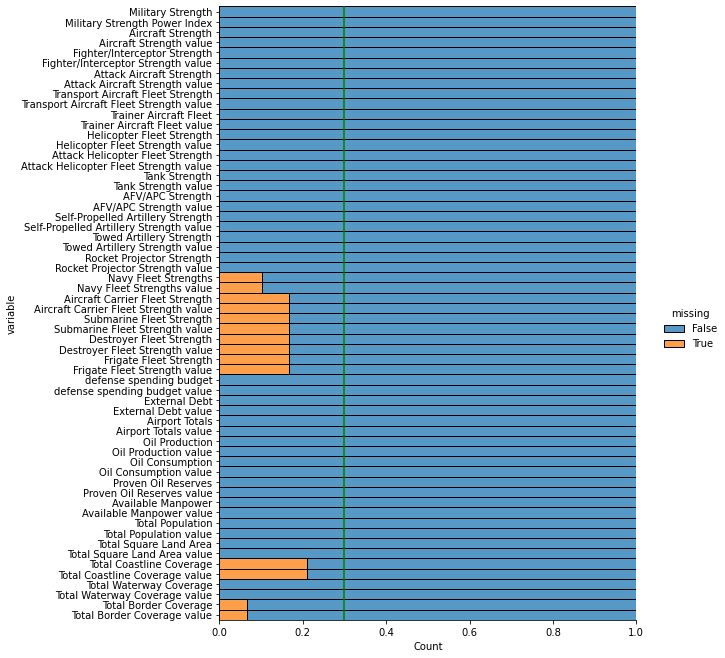

In [34]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [29]:
value_df.loc[value_df["Total Coastline Coverage value"].isnull(), ['country',
                                                                             'Navy Fleet Strengths value',
                                                                             'Aircraft Carrier Fleet Strength value',
                                                                             'Submarine Fleet Strength value',
                                                                             'Destroyer Fleet Strength value',
                                                                             'Frigate Fleet Strength value',
                                                                             'Total Waterway Coverage value']]

,country,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


In [32]:
value_df.loc[
    
    value_df["Total Coastline Coverage value"].isnull(),
    
    ['Navy Fleet Strengths value',
     'Aircraft Carrier Fleet Strength value',
     'Submarine Fleet Strength value',
     'Destroyer Fleet Strength value',
     'Frigate Fleet Strength value']
     ]=0

<Figure size 288x432 with 0 Axes>

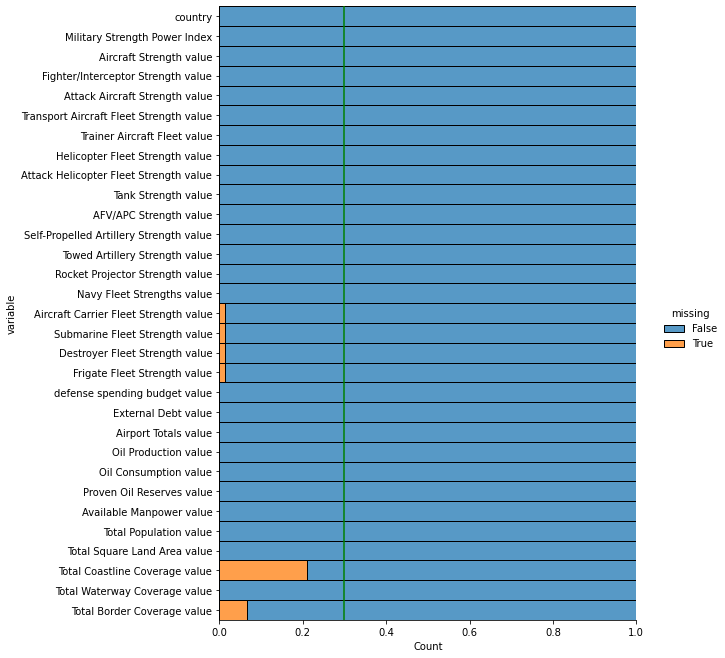

In [35]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [36]:
value_df.loc[value_df['Aircraft Carrier Fleet Strength value'].isnull()|
             value_df['Submarine Fleet Strength value'].isnull()|
             value_df['Destroyer Fleet Strength value'].isnull()|
             value_df['Frigate Fleet Strength value'].isnull()] 

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
110,South Korea,0.1509,1649.0,414.0,71.0,41.0,298.0,803.0,112.0,2614.0,...,111.0,0.0,"28,00,000",0.0,"2,57,09,049","5,14,18,097",99720.0,2413.0,1600.0,237.0
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,53.0,46070.0,"1,42,000","59,40,00,000","1,59,12,566","3,00,23,709","4,47,400",420.0,1100.0,6893.0


In [37]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] 

,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [38]:
value_df.loc[value_df["country"] == "Uzbekistan",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] = 0

In [39]:
value_df.loc[value_df["country"] == "South Korea",
            ['Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] 

,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [40]:
value_df.loc[((value_df['Navy Fleet Strengths value'] > 200) & 
             (value_df['Navy Fleet Strengths value'] < 250)),
            ['country',
             'Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] 

,country,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [41]:
value_df.loc[value_df["country"] == "France",
             ['country',
             'Navy Fleet Strengths value',
             'Aircraft Carrier Fleet Strength value',
             'Submarine Fleet Strength value',
             'Destroyer Fleet Strength value',
             'Frigate Fleet Strength value',
           ]] 

,country,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value
40,France,180.0,4.0,9.0,11.0,11.0


In [44]:
value_df.loc[value_df["country"] == "South Korea",'Aircraft Carrier Fleet Strength value'] = 2
value_df.loc[value_df["country"] == "South Korea",'Submarine Fleet Strength value'] = 19
value_df.loc[value_df["country"] == "South Korea",'Destroyer Fleet Strength value'] = 12
value_df.loc[value_df["country"] == "South Korea",'Frigate Fleet Strength value'] = 12

<Figure size 288x432 with 0 Axes>

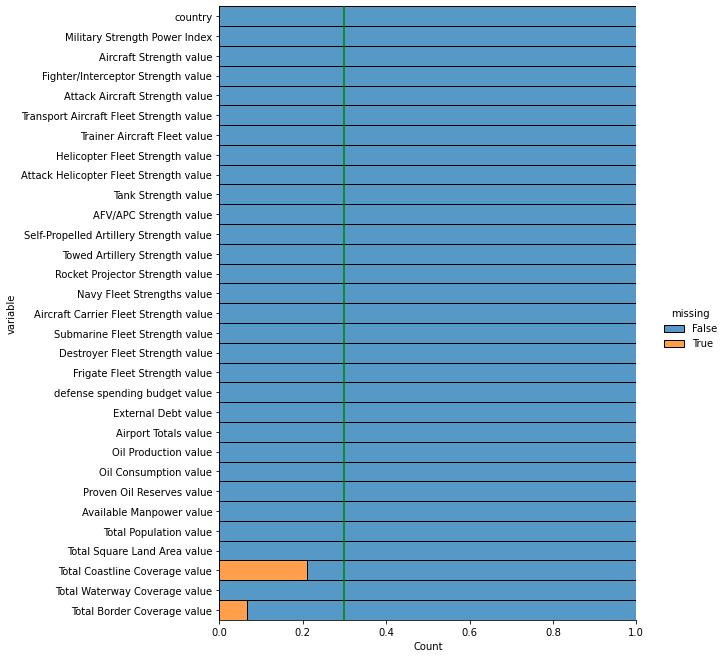

In [45]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [46]:
value_df.loc[value_df['Total Coastline Coverage value'].isnull()]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0.0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,...,52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0.0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500.0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0.0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,...,855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000.0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,...,74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0.0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,...,23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0.0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,...,39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,2800.0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,...,59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0.0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,...,128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,664.0,2046.0


In [47]:
value_df.loc[value_df['Total Coastline Coverage value'].isnull(), 
                      'Total Coastline Coverage value']  = 0 

In [48]:
value_df.loc[value_df['Total Border Coverage value'].isnull()]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,...,4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
57,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,...,175.0,3841.0,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.0,1770.0,NaN
69,Madagascar,3.0869,6.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,...,83.0,0.0,18500.0,0.0,"1,01,45,026","2,56,83,610","5,87,040",4828.0,600.0,NaN
83,New Zealand,1.3684,48.0,0.0,0.0,7.0,13.0,22.0,0.0,0.0,...,123.0,31480.0,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.0,0.0,NaN
95,Philippines,0.7852,171.0,0.0,19.0,23.0,24.0,97.0,0.0,7.0,...,247.0,15000.0,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.0,3219.0,NaN
105,Singapore,0.7966,235.0,100.0,0.0,9.0,36.0,77.0,17.0,180.0,...,9.0,0.0,"13,40,000",0.0,"40,17,314","59,95,991",697.0,193.0,10.0,NaN
113,Sri Lanka,1.4661,77.0,0.0,0.0,15.0,6.0,54.0,9.0,202.0,...,19.0,0.0,90000.0,0.0,"1,09,27,071","2,25,76,592",65610.0,1340.0,160.0,NaN
119,Taiwan,0.4008,744.0,289.0,0.0,19.0,207.0,210.0,91.0,1180.0,...,37.0,196.0,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.0,1566.0,3720.0,NaN


In [49]:
value_df.loc[value_df['Total Border Coverage value'].isnull(), 
                      'Total Border Coverage value' ] = 0

<Figure size 288x432 with 0 Axes>

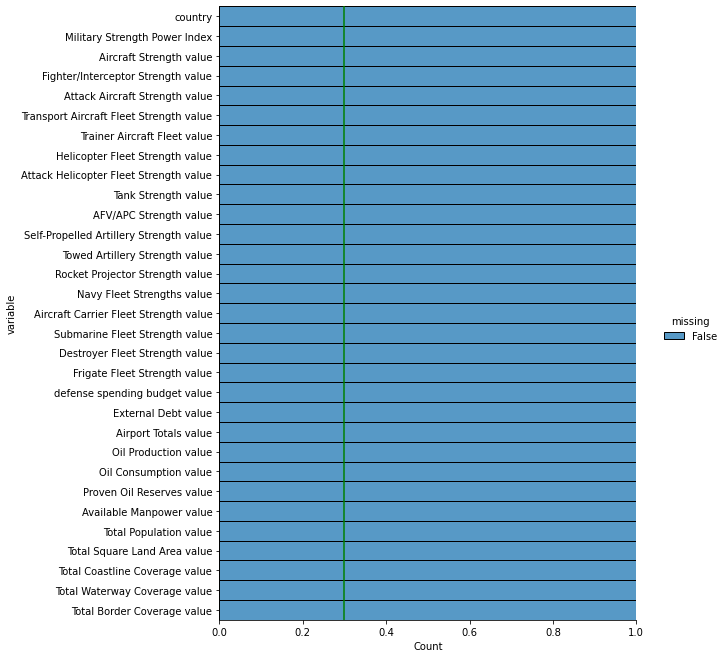

In [51]:
plt.figure(figsize=(4,6))
sns.displot(
    data=value_df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.3,color="g");

In [54]:
value_df.reset_index(drop=True,inplace=True)

## Fix the dtypes

In [55]:
value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    float64
 3   Fighter/Interceptor Strength value       138 non-null    float64
 4   Attack Aircraft Strength value           138 non-null    float64
 5   Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Trainer Aircraft Fleet value             138 non-null    float64
 7   Helicopter Fleet Strength value          138 non-null    float64
 8   Attack Helicopter Fleet Strength value   138 non-null    float64
 9   Tank Strength value                      138 non-null    float64
 10  AFV/APC Strength value                   138 non-n

In [56]:
value_df.select_dtypes("object")

,country,defense spending budget value,External Debt value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


In [57]:
value_df.select_dtypes("object")["Oil Production value"].str.replace(",","")

0          NaN
1          NaN
2      1306000
3      1666000
4       479400
        ...   
133    2007000
134     271400
135        NaN
136        NaN
137        NaN
Name: Oil Production value, Length: 138, dtype: object

In [58]:
columns = value_df.select_dtypes("object").columns
columns

Index(['country', 'defense spending budget value', 'External Debt value',
       'Oil Production value', 'Oil Consumption value',
       'Proven Oil Reserves value', 'Available Manpower value',
       'Total Population value', 'Total Square Land Area value',
       'Total Coastline Coverage value', 'Total Waterway Coverage value'],
      dtype='object')

In [59]:
for col in columns[1:]:
    value_df[col]  = value_df[col].astype("str")
    value_df[col]  = value_df.select_dtypes("object")[col].str.replace(',','')
    value_df[col]  = value_df[col].astype("float")

In [60]:
 value_df.select_dtypes("object")

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Argentina
...,...
133,Venezuela
134,Vietnam
135,Yemen
136,Zambia


## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [61]:
value_df.columns

Index(['country', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value

In [62]:
value_df.drop(['Total Square Land Area value',
               'Total Coastline Coverage value',
               'Total Waterway Coverage value',
               'Total Border Coverage value'],axis=1,inplace=True)

## Visualy inspect the some features

In [69]:
! pip install plotly 

In [70]:
import plotly.express as px

In [73]:
fig = px.bar(value_df,x= "country" , y = value_df["Aircraft Strength value"])
fig.show()

In [74]:
fig = px.box(value_df, x = value_df["Aircraft Strength value"],
             hover_name=value_df["country"])
fig.show()

## Decriptive statistics

In [75]:
value_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


In [76]:
fig = px.imshow(value_df.corr())
fig.show()

# Data Preprocessing

In [77]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [78]:
X = value_df.drop(["country"], axis=1)

In [79]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [81]:
pip install pyclustertend

  Using cached pyclustertend-1.7.0-py3-none-any.whl (7.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [82]:
from pyclustertend import hopkins

In [83]:
hopkins(X, X.shape[0])

0.07557446792467348

## Clustering with K-means

In [84]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [85]:
ssd

[1909.4825400661186,
 1319.9462230410888,
 1032.0768081318024,
 837.3302618438706,
 700.9826518601566,
 596.8408007852493,
 498.2157649891474,
 439.3586012427771]

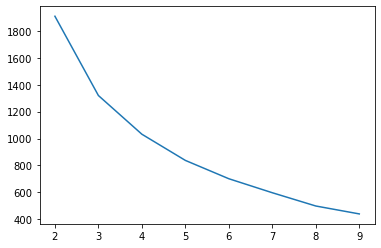

In [86]:
sns.lineplot(x=K, y = ssd,markers="x")

plt.show()

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [91]:
! pip install -U yellowbrick

  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)


In [92]:
from yellowbrick.cluster import KElbowVisualizer

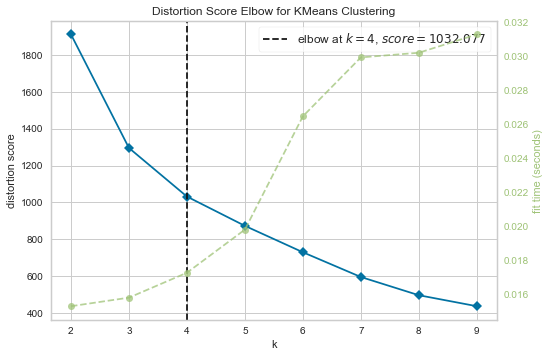

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

### Model Building and label visualisation

In [94]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [95]:
model.inertia_

1033.8390912573811

In [96]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 1, 0,
       0, 0, 3, 0, 0, 0])

In [97]:
value_df["cluster"] = model.labels_

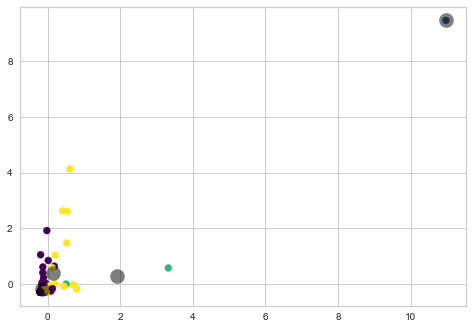

In [98]:
centroids = model.cluster_centers_

plt.scatter(X[:,18], X[:,19], c = value_df.cluster, s = 50, cmap = "viridis")
plt.scatter(centroids[:,18], centroids[:,19], c = "black", s = 200, alpha=0.5);

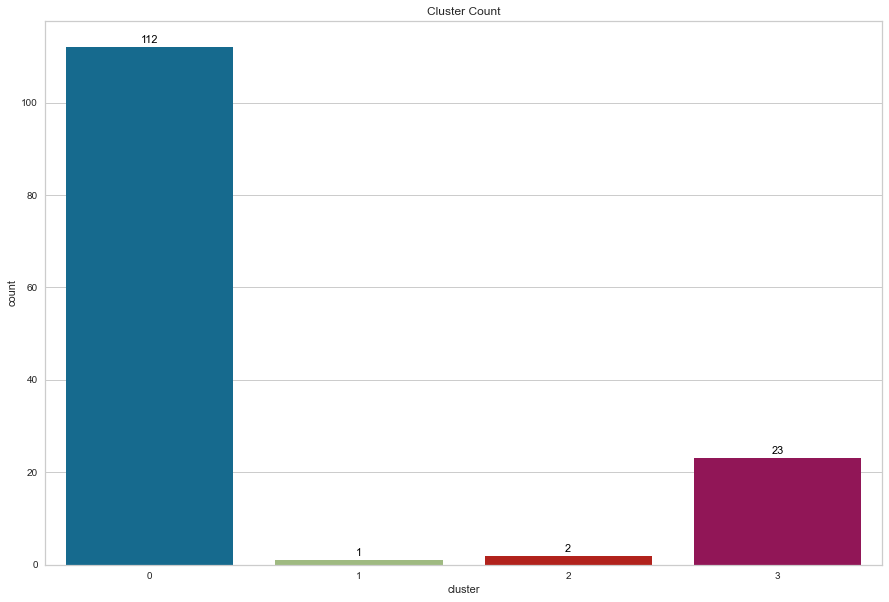

In [99]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [100]:
value_df[value_df["cluster"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,0.0,1.385000e+09,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,0.0,9.750000e+08,1.690000e+10,53.0,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,0
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,0.0,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,0.0,4.000000e+07,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0


In [101]:
value_df[value_df["cluster"] == 1]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,1


In [102]:
value_df[value_df["cluster"] == 2]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,52.0,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,2
101,Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,...,10.0,4.800000e+10,5.396000e+11,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,2


In [103]:
value_df[value_df["cluster"] == 3]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,4.165749e+07,3
17,Brazil,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,...,7.0,2.780000e+10,5.474000e+11,4093.0,2622000.0,3020000.0,1.300000e+10,107764996.0,2.088469e+08,3
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,12.0,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,3
35,Egypt,0.1872,1054.0,215.0,88.0,59.0,387.0,294.0,81.0,4295.0,...,7.0,1.120000e+10,7.747000e+10,83.0,589400.0,832000.0,4.400000e+09,42946553.0,9.941332e+07,3
40,France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,...,11.0,4.150000e+10,5.360000e+12,464.0,15170.0,1600000.0,7.235000e+07,30111868.0,6.736436e+07,3
43,Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,...,9.0,5.000000e+10,5.326000e+12,539.0,43410.0,2500000.0,1.454000e+08,37010559.0,8.045774e+07,3
45,Greece,0.5311,566.0,187.0,0.0,15.0,143.0,231.0,29.0,1355.0,...,13.0,4.844000e+09,5.066000e+11,77.0,2753.0,350000.0,1.000000e+07,4993347.0,1.076152e+07,3
49,India,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,...,13.0,6.100000e+10,5.016000e+11,346.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,3
50,Indonesia,0.2544,462.0,41.0,39.0,54.0,109.0,177.0,16.0,313.0,...,7.0,7.600000e+09,3.444000e+11,673.0,801700.0,1630000.0,3.230000e+09,130868127.0,2.627874e+08,3
51,Iran,0.2191,509.0,155.0,23.0,62.0,94.0,100.0,12.0,2056.0,...,7.0,1.960000e+10,7.995000e+09,319.0,4469000.0,2000000.0,1.584000e+11,47324105.0,8.302474e+07,3


### Evaluate 

In [104]:
from sklearn.metrics import silhouette_score

In [105]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster)}')

Silhouette Score(n=4): 0.5253064588056993


In [133]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8644786857054572
For n_clusters=3, the silhouette score is 0.8193950812093086
For n_clusters=4, the silhouette score is 0.4956608189413284
For n_clusters=5, the silhouette score is 0.5177311271740322
For n_clusters=6, the silhouette score is 0.48669858072616184
For n_clusters=7, the silhouette score is 0.48632074984250384
For n_clusters=8, the silhouette score is 0.47714406079950733
For n_clusters=9, the silhouette score is 0.21512938360600717


In [107]:
den = pd.DataFrame(X,columns=value_df.drop(["country","cluster"],axis=1).columns)
den["cluster"] = value_df["cluster"]

clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
Military Strength Power Index,0.209001,-1.061327,-1.055263,-0.879836
Aircraft Strength value,-0.220108,10.489144,2.686763,0.382151
Fighter/Interceptor Strength value,-0.261190,8.729991,4.230860,0.524417
Attack Aircraft Strength value,-0.209619,7.317921,5.635064,0.212579
Transport Aircraft Fleet Strength value,-0.210509,9.943640,3.193295,0.315076
Trainer Aircraft Fleet value,-0.218901,10.670489,1.344839,0.485076
Helicopter Fleet Strength value,-0.203281,10.831533,2.049863,0.340707
Attack Helicopter Fleet Strength value,-0.200884,9.707636,3.922510,0.215061
Tank Strength value,-0.278982,3.736804,5.018954,0.759621
AFV/APC Strength value,-0.290573,6.820244,5.107360,0.674316


## Hierarchical Clustering

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [134]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

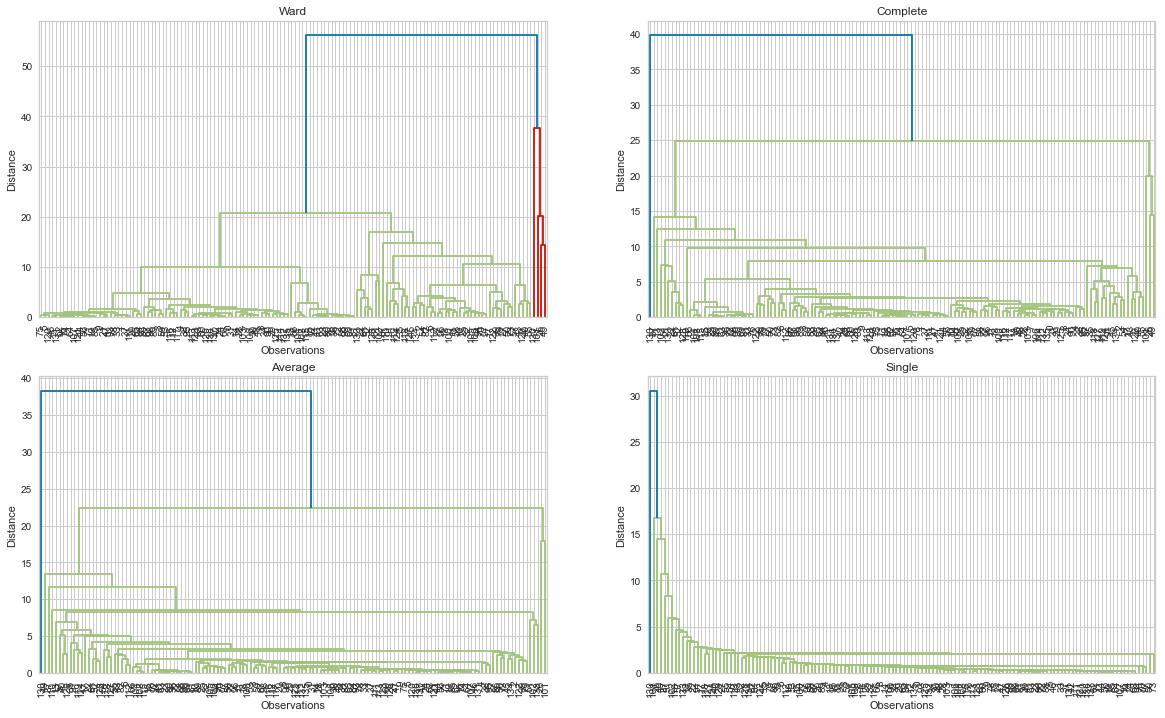

In [135]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building and label visualisation

In [112]:
from sklearn.cluster import AgglomerativeClustering

In [136]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3], dtype=int64)

In [140]:
value_df["cluster_1"] = model1.labels_

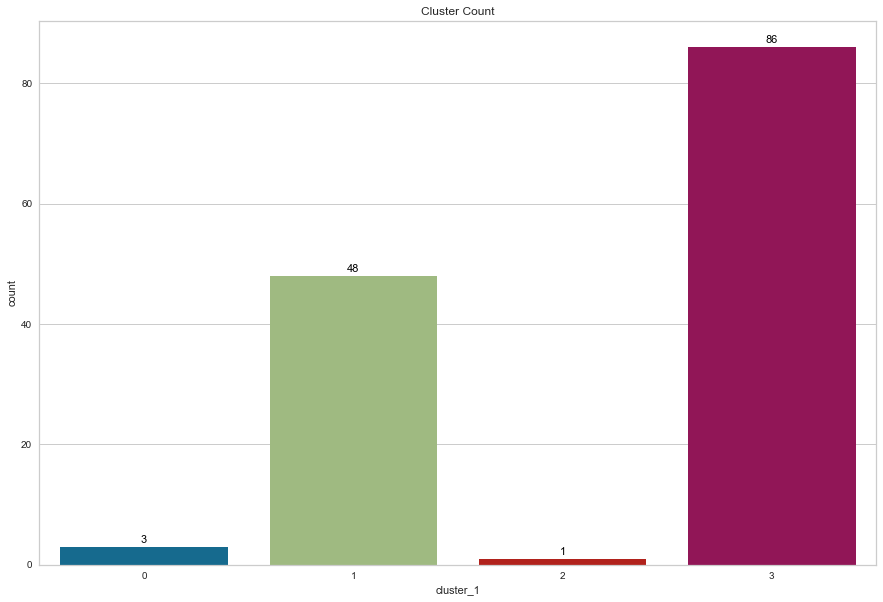

In [141]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [126]:
value_df[value_df["cluster_1"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,2,0
49,India,0.0953,2123.0,538.0,172.0,250.0,359.0,722.0,23.0,4292.0,...,6.100000e+10,5.016000e+11,346.0,733900.0,5000000.0,4.621000e+09,622480340.0,1.296834e+09,3,0
101,Russia,0.0681,4163.0,873.0,742.0,424.0,497.0,1522.0,531.0,12950.0,...,4.800000e+10,5.396000e+11,1218.0,10580000.0,3225000.0,8.000000e+10,69640160.0,1.421228e+08,2,0


In [127]:
value_df[value_df["cluster_1"] == 1]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,3,1
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,23470145.0,0,1
10,Bangladesh,0.7066,177.0,44.0,0.0,11.0,57.0,67.0,0.0,276.0,...,3.800000e+09,5.026000e+10,18.0,3666.0,112000.0,2.800000e+07,78913289.0,159453001.0,0,1
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,...,6.237028e+08,3.992000e+10,65.0,32000.0,190000.0,1.980000e+08,4982905.0,9527543.0,0,1
17,Brazil,0.1988,715.0,43.0,78.0,126.0,198.0,242.0,12.0,437.0,...,2.780000e+10,5.474000e+11,4093.0,2622000.0,3020000.0,1.300000e+10,107764996.0,208846892.0,3,1
18,Bulgaria,0.8916,63.0,13.0,4.0,5.0,20.0,25.0,2.0,710.0,...,1.079000e+09,4.206000e+10,68.0,1000.0,115000.0,1.500000e+07,3278916.0,7057504.0,0,1
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,35881659.0,3,1
25,Chile,0.7668,282.0,44.0,0.0,30.0,93.0,92.0,0.0,300.0,...,4.250000e+09,1.834000e+11,481.0,3244.0,325000.0,1.500000e+08,8657902.0,17925262.0,0,1
27,Colombia,0.6045,469.0,21.0,38.0,76.0,80.0,224.0,0.0,0.0,...,1.060000e+10,1.246000e+11,836.0,853600.0,300000.0,2.002000e+09,24084498.0,48168996.0,0,1
32,Denmark,0.7878,113.0,33.0,0.0,4.0,38.0,35.0,0.0,57.0,...,4.760000e+09,4.848000e+11,80.0,137100.0,162000.0,4.906000e+08,2590457.0,5809502.0,0,1


In [143]:
value_df[value_df["cluster_1"] == 2]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,1,2,2


In [142]:
value_df[value_df["cluster_1"] == 3]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0,3,3
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0,3,3
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0,3,3
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0,3,3
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,...,1.041000e+10,11.0,0.0,47500.0,0.000000e+00,1696085.0,3038217.0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Uruguay,1.8909,50.0,0.0,7.0,9.0,16.0,13.0,0.0,78.0,...,2.837000e+10,133.0,0.0,55600.0,0.000000e+00,1549878.0,3369299.0,0,3,3
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,...,1.690000e+10,53.0,46070.0,142000.0,5.940000e+08,15912566.0,30023709.0,0,3,3
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0,3,3
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0,3,3


### Evaluate 

In [146]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_1)}')

Silhouette Score(n=4): 0.3546913282067596


In [147]:
from sklearn.cluster import MeanShift

In [148]:
model2 = MeanShift(bandwidth=.1).fit(X)

In [149]:
model2.fit_predict(X)

array([ 59,  22, 109,  81,  94,  26, 118,  71,  73,  44,  91,  84,  67,
         1,  70,   4,  29, 127,  75,  40,  30,  36, 113,   8,  50,  90,
       134, 100,  68,  64, 103,  66,  88,  17,  69, 128,  11,  18,  77,
        78, 130,   7,  48, 124,  31, 104,  45,  27,  83, 133, 121, 123,
        87,  38, 119, 125,  33, 132,  65,  74,  53,  52,  39,   6,  35,
        19,   2,  57,  54,  12,  93,  41,  13,  99,  25,  32,  14,  80,
        21, 102,   9,  15, 101,  58,  23,  34,  95, 112,  10, 106,  62,
       122,   5,  24,  97,  89, 116,  76,  47,  16,  98, 135, 120,  72,
         3,  86,  79,  37,   0, 108, 131,  20, 117,  55,  61,   0, 105,
       107,  82, 111,  43,  28, 114,  56, 126,  60,  51, 110,  92, 129,
       136,  42,  85,  96, 115,  63,  49,  46], dtype=int64)

In [150]:
model2.labels_

array([ 59,  22, 109,  81,  94,  26, 118,  71,  73,  44,  91,  84,  67,
         1,  70,   4,  29, 127,  75,  40,  30,  36, 113,   8,  50,  90,
       134, 100,  68,  64, 103,  66,  88,  17,  69, 128,  11,  18,  77,
        78, 130,   7,  48, 124,  31, 104,  45,  27,  83, 133, 121, 123,
        87,  38, 119, 125,  33, 132,  65,  74,  53,  52,  39,   6,  35,
        19,   2,  57,  54,  12,  93,  41,  13,  99,  25,  32,  14,  80,
        21, 102,   9,  15, 101,  58,  23,  34,  95, 112,  10, 106,  62,
       122,   5,  24,  97,  89, 116,  76,  47,  16,  98, 135, 120,  72,
         3,  86,  79,  37,   0, 108, 131,  20, 117,  55,  61,   0, 105,
       107,  82, 111,  43,  28, 114,  56, 126,  60,  51, 110,  92, 129,
       136,  42,  85,  96, 115,  63,  49,  46], dtype=int64)

In [151]:
value_df["cluster_2"] = model2.labels_

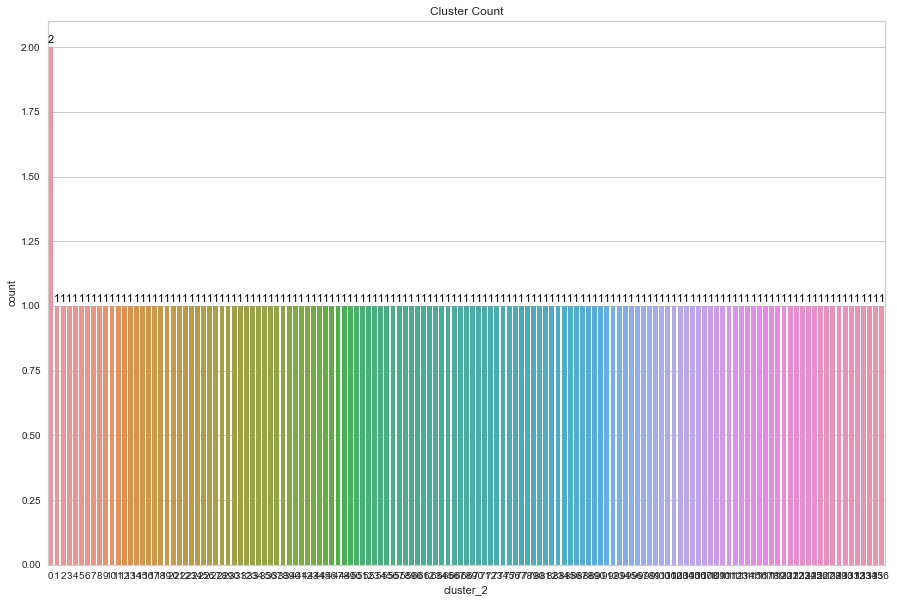

In [152]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = value_df.cluster_2)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [153]:
value_df[value_df["cluster_2"] == 0]

,country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,cluster,cluster_1,cluster_0,cluster_2
108,Somalia,4.6404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,61.0,0.0,6200.0,0.0,2702167.0,11259029.0,0,3,3,0
115,Suriname,4.6042,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,55.0,17000.0,15100.0,83980000.0,132740.0,597927.0,0,3,3,0


In [154]:
print(f'Silhouette Score(n=4): {silhouette_score(X, value_df.cluster_2)}')

Silhouette Score(n=4): 0.010516752511026097
